<a href="https://colab.research.google.com/github/ThrishaJawahar/Tesla-Stock-Data/blob/main/Tesla_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1: Use yfinance to Extract Stock Data Question.


---


2: Use Webscraping to Extract Tesla Revenue Data Question

---


3: Use Webscraping to Extract GME Revenue Data Question

---


4: Plot Tesla Stock Graph Question 6: Plot GameStop Stock Graph

---



In [20]:

#Question 1
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [21]:
#Question 2
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

html_data = response.text

print(html_data)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [5]:
from bs4 import BeautifulSoup

html_data = """
<!DOCTYPE html>
<html>
<head>
    <title>Sample Webpage</title>
</head>
<body>
    <h1>Welcome to the Sample Webpage</h1>
    <p>This is a paragraph.</p>
</body>
</html>
"""

soup = BeautifulSoup(html_data, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Sample Webpage
  </title>
 </head>
 <body>
  <h1>
   Welcome to the Sample Webpage
  </h1>
  <p>
   This is a paragraph.
  </p>
 </body>
</html>



In [17]:

# Extracting the table with Tesla Revenue
table = soup.find("table")

tesla_revenue = pd.read_html(str(table))[0]

tesla_revenue.columns = ["Date", "Revenue"]
print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


<ipython-input-17-dab13eb419ee>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [7]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '')

print(tesla_revenue.head())

   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


In [18]:
# Dropping rows with missing values
tesla_revenue.dropna(inplace=True)

# Removing rows where the Revenue column is empty
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [9]:
tesla_revenue.tail(5)

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [22]:
#question 3
import yfinance as yf
import pandas as pd


gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [11]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
soup = BeautifulSoup(html_data_2, 'html.parser')
table = soup.find("table")
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
print(gme_revenue.tail(5))


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


<ipython-input-11-85fb1d142e3c>:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


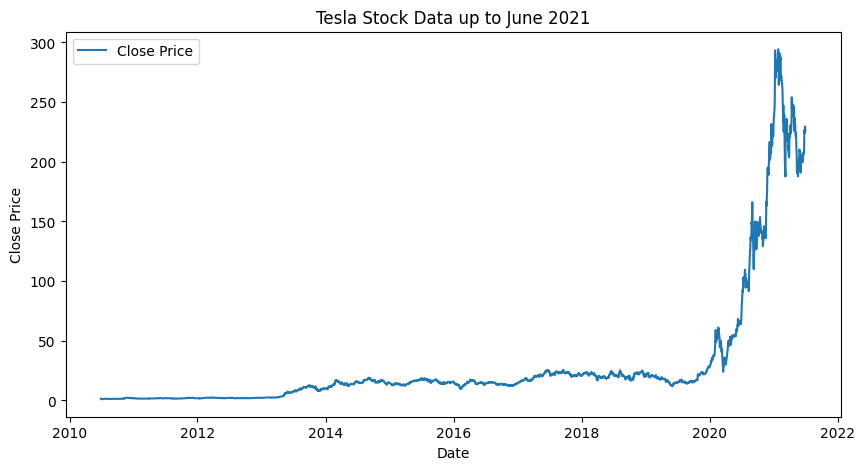

In [23]:

#question 4
!pip install matplotlib
import matplotlib.pyplot as plt


def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.show()

tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
make_graph(tesla_data_filtered, 'Tesla Stock Data up to June 2021')


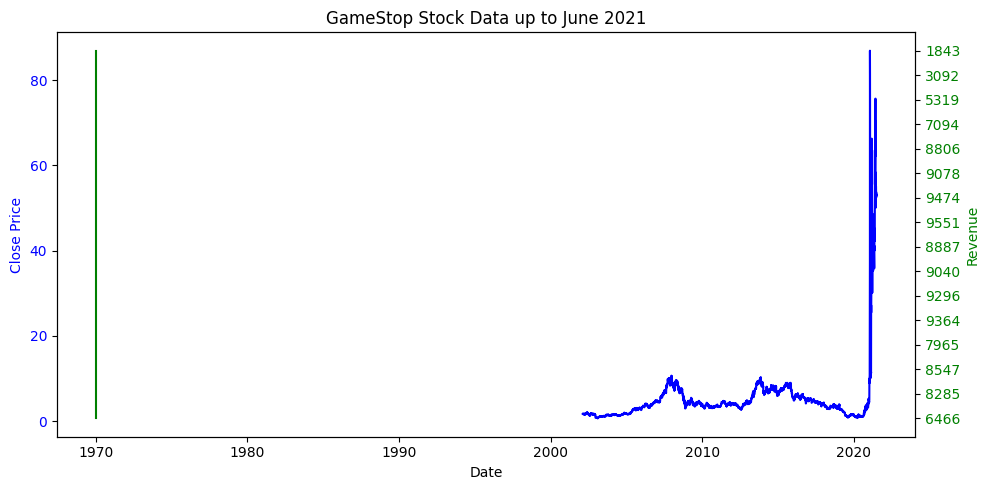

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Close Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# Filter the data to show only up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
# Convert 'Date' column to datetime objects
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= pd.to_datetime('2021-06-30')]

# Call the make_graph function with the filtered data and a title
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Data up to June 2021')